Importing Libraries

In [1]:
import pandas as pd
import fbprophet
from fbprophet import Prophet
import matplotlib.pyplot as plt
from fbprophet.plot import add_changepoints_to_plot
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.figure_factory as ff
import seaborn as sns

Importing Dataset for basic visualization

In [2]:
df_corona=pd.read_csv("/Users/vidushigupta/Desktop/Vidushi/covid_hospital/covid_19_india.csv")
df_corona.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


Checking for any null values

In [3]:
df_corona.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [4]:
df_corona.fillna(0,inplace=True)

Converting values of the 'Deaths' column to numeric values

In [5]:
df_corona['Deaths']=pd.to_numeric(df_corona['Deaths'])

Making new columns in existing dataframe to visualise 'Total Cases' and 'Active Cases'

In [6]:
df_corona['Total Cases'] = df_corona['Cured'] + df_corona['Deaths'] + df_corona['Confirmed']
df_corona['Active Cases'] = df_corona['Total Cases'] - df_corona['Cured'] - df_corona['Deaths']
df_corona.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3


Plotting datewise data for cured cases using Plotly

In [7]:
corona_data = df_corona.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Cured',ascending = True)

fig = px.bar(corona_data, y='Cured', x='Date',hover_data =['Cured'], color='Cured', height=600,color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(
    title='Cured Cases-India')
fig.show()

Plotting datewise data for daily positive cases in India using Plotly

In [8]:
corona_data = df_corona.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = True)
corona_data['Daily Cases'] = corona_data['Total Cases'].sub(corona_data['Total Cases'].shift())
corona_data['Daily Cases'].iloc[0] = corona_data['Total Cases'].iloc[0]
corona_data['Daily Cases'] = corona_data['Daily Cases'].astype(int)
fig = px.bar(corona_data, y='Daily Cases', x='Date',hover_data =['Daily Cases'], color='Daily Cases', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='Daily Cases-India')
fig.show()

Importing dataset for prediction using FB Prophet model

In [9]:
df = pd.read_csv(r"/Users/vidushigupta/Desktop/Vidushi/covid_hospital/daily_data.csv", index_col='Date',parse_dates=True)
df.head(5)

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-02,1.0,2.0,0.0,0.0,0.0,0.0
2020-02-03,1.0,3.0,0.0,0.0,0.0,0.0


In [10]:
df_1=df[['Total Confirmed','Total Recovered','Total Deceased']]
df_1.head()

,Total Confirmed,Total Recovered,Total Deceased
Date,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0


In [11]:
df_1=df_1.dropna()
df_1

,Total Confirmed,Total Recovered,Total Deceased
Date,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0
...,...,...,...
2020-07-09,794847.0,495962.0,21626.0
2020-07-10,822609.0,516251.0,22146.0
2020-07-11,850366.0,536232.0,22689.0


Plotting the data to know its kind using Matplotlib

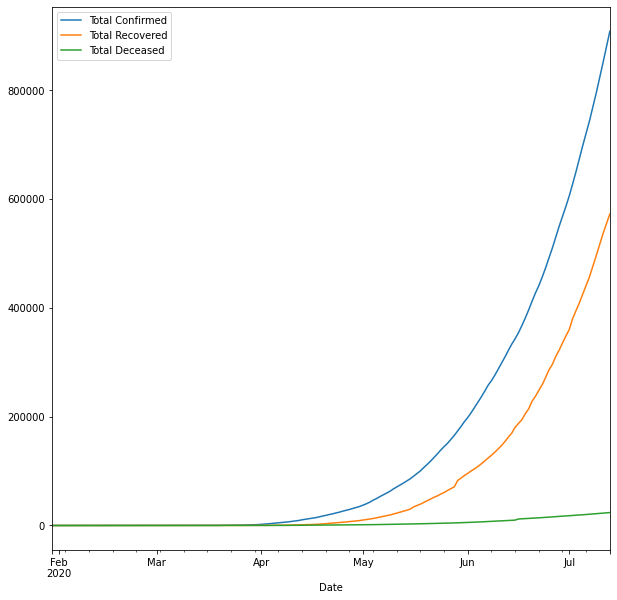

In [12]:
df_1.plot(kind='line',figsize=(10,10))

In [13]:
df_2=df_1[['Total Confirmed']]
df_2

,Total Confirmed
Date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0
...,...
2020-07-09,794847.0
2020-07-10,822609.0
2020-07-11,850366.0


Initiating the model

In [14]:
m=Prophet()

Adding monthly seasonality to the model with a period and fourier order of default values source:facebook.github.io

In [15]:
m.add_seasonality(name="Monthly",period=30.5,fourier_order=5)

In [16]:
df_2.reset_index(level=0, inplace=True)
df_2.head()

,Date,Total Confirmed
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


Renaming the columns according to the format to ds and y for the model to forecast the confirmed cases

In [17]:
df_2.rename(columns={"Date":"ds","Total Confirmed":"y"}, inplace=True)
df_2.head()

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


In [18]:
df_2.tail()

,ds,y
161,2020-07-09,794847.0
162,2020-07-10,822609.0
163,2020-07-11,850366.0
164,2020-07-12,879472.0
165,2020-07-13,907650.0


Splitting the data as the training data and testing data by 85 percent approximately

In [19]:
train= df_2[:130]
test=df_2[130:]

Fitting the model with the training data

In [20]:
 m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Making a dataframe with future dates for forecasting till the 25th July

In [21]:
future_dates=m.make_future_dataframe(periods=48)
future_dates.tail()

,ds
173,2020-07-21
174,2020-07-22
175,2020-07-23
176,2020-07-24
177,2020-07-25


Predicting using the model

In [22]:
prediction=m.predict(future_dates)
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
173,2020-07-21,531186.763147,493629.229528,566670.863139
174,2020-07-22,537559.081763,498430.434432,572484.113656
175,2020-07-23,544513.268772,504117.362947,581143.957807
176,2020-07-24,551459.668729,509542.228271,590280.534440
177,2020-07-25,558430.014958,514381.990334,599142.289324


Plotting the prediction

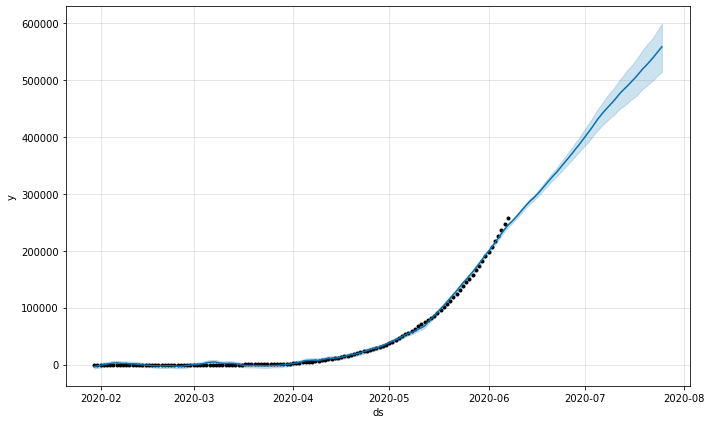

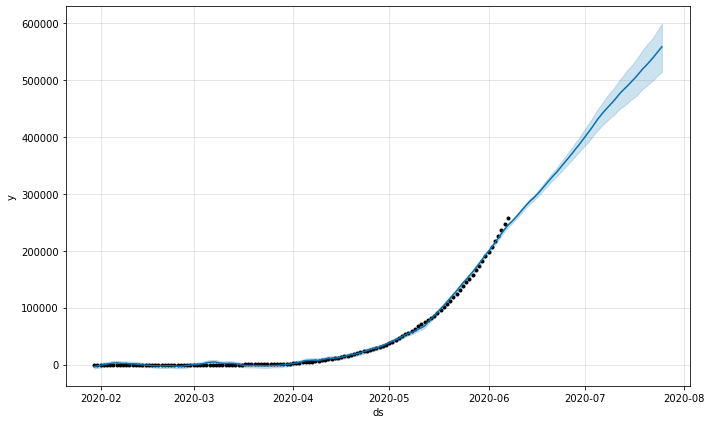

In [23]:
m.plot(prediction,uncertainty=True)

Plotting components of the prediction

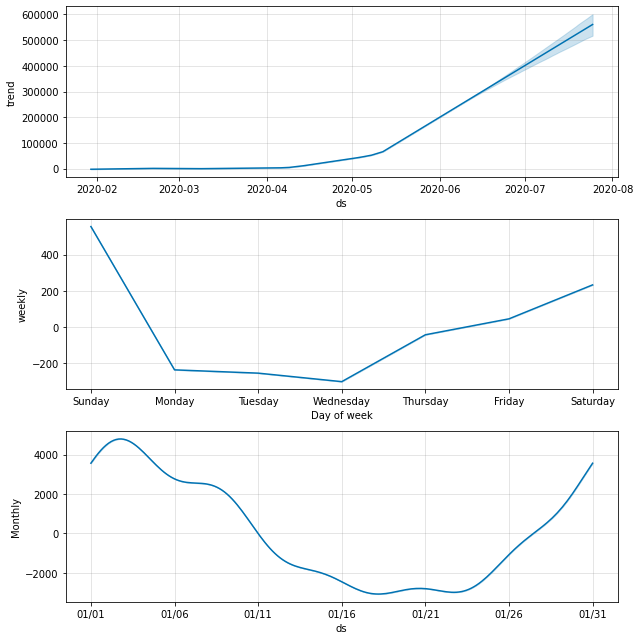

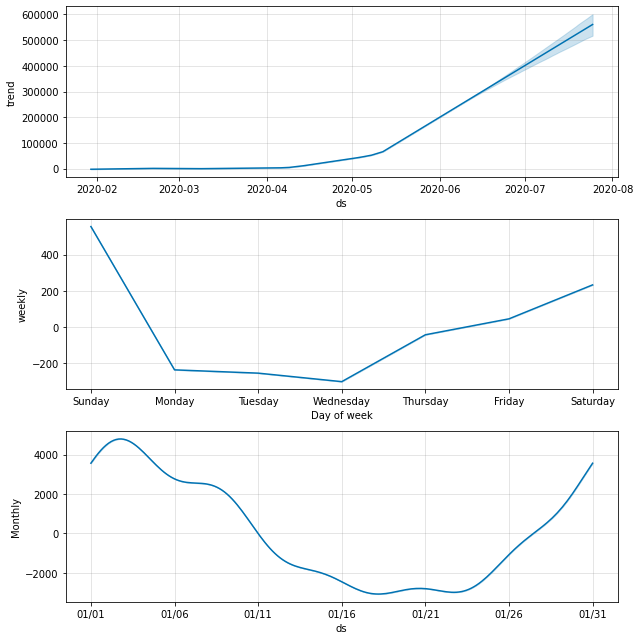

In [24]:
m.plot_components(prediction)

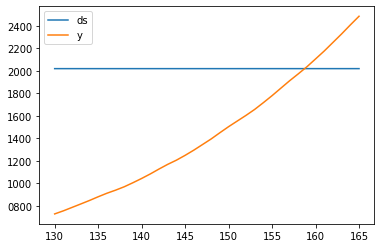

In [25]:
test.plot()

Plotting the changepoints in the trend

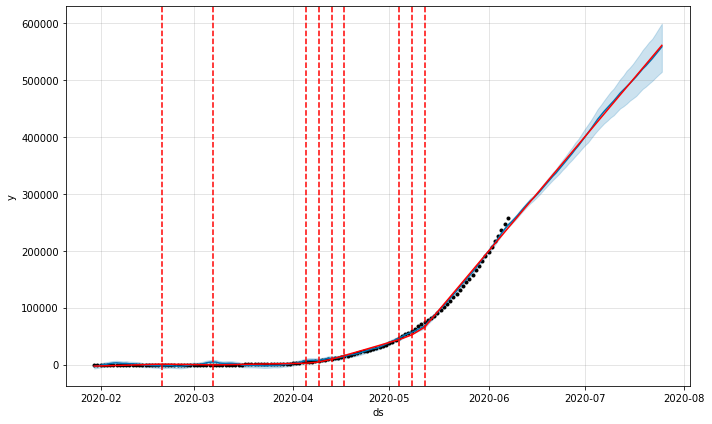

In [26]:
fig=m.plot(prediction)
c=add_changepoints_to_plot(fig.gca(),m,prediction)

Model validation

In [27]:
df_new = prediction.set_index('ds')[['yhat']].join(df_2.set_index('ds').y).reset_index()
df_new.tail()


,ds,yhat,y
173,2020-07-21,531186.763147,NaN
174,2020-07-22,537559.081763,NaN
175,2020-07-23,544513.268772,NaN
176,2020-07-24,551459.668729,NaN
177,2020-07-25,558430.014958,NaN


In [28]:
df_new.dropna(inplace=True)
df_new.tail()

,ds,yhat,y
161,2020-07-09,457272.741087,794847.0
162,2020-07-10,463417.235767,822609.0
163,2020-07-11,470070.123186,850366.0
164,2020-07-12,477025.428605,879472.0
165,2020-07-13,482594.576240,907650.0


In [29]:
r2_score(df_new.y, df_new.yhat)

0.8233462941151735

Model accuracy as 82.33 percent

Comparing the confirmed cases to the number of hospital beds available state wise

In [30]:
df_hospital=pd.read_csv("/Users/vidushigupta/Desktop/Vidushi/covid_hospital/beds_india.csv")
df_hospital

,Sno,State,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total Beds
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500,2419
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658,87527
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268,5340
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198,39923
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936,35140
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778,4632
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342,26026
7,8,Dadra and Nagar Haveli and Daman and Diu,13,4,1.0,3,21,866,15,513,1,316,1753
8,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383,46294
9,11,Goa,31,4,2.0,3,40,2666,17,1405,25,1608,5801


In [31]:
df_hospital=df_hospital[['State','Total Beds']]
df_hospital

,State,Total Beds
0,Andaman & Nicobar Islands,2419
1,Andhra Pradesh,87527
2,Arunachal Pradesh,5340
3,Assam,39923
4,Bihar,35140
5,Chandigarh,4632
6,Chhattisgarh,26026
7,Dadra and Nagar Haveli and Daman and Diu,1753
8,Delhi,46294
9,Goa,5801


In [32]:
df_statewise=pd.read_csv("/Users/vidushigupta/Desktop/Vidushi/covid_hospital/state_wise .csv")
df_statewise

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Andaman and Nicobar Islands,180,133,0,47,16/07/2020 20:52:11,0,AN,0,0,0,NaN
1,Andhra Pradesh,40646,20298,534,19814,17/07/2020 15:09:04,0,AP,2602,905,42,Total includes patients from other states and ...
2,Arunachal Pradesh,543,153,3,387,16/07/2020 23:39:08,0,AR,0,0,0,NaN
3,Assam,20647,13555,55,7034,17/07/2020 00:17:02,3,AS,0,0,0,Includes one case from Nagaland.\nTotal of 3 p...
4,Bihar,23300,14997,173,8130,17/07/2020 17:17:01,0,BR,1742,896,6,NaN
5,Chandigarh,660,480,11,169,17/07/2020 16:57:02,0,CH,25,4,0,NaN
6,Chhattisgarh,4754,3451,21,1282,16/07/2020 21:11:03,0,CT,0,0,0,NaN
7,Dadra and Nagar Haveli and Daman and Diu,576,392,2,175,16/07/2020 21:51:13,7,DN,0,0,0,3 cases are migrated to different states which...
8,Delhi,118645,97693,3545,17407,16/07/2020 19:17:00,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
9,Goa,3108,1817,19,1272,16/07/2020 20:52:05,0,GA,0,0,0,NaN


In [33]:
df_cases=df_statewise[['State','Confirmed','Deaths']]
df_cases

,State,Confirmed,Deaths
0,Andaman and Nicobar Islands,180,0
1,Andhra Pradesh,40646,534
2,Arunachal Pradesh,543,3
3,Assam,20647,55
4,Bihar,23300,173
5,Chandigarh,660,11
6,Chhattisgarh,4754,21
7,Dadra and Nagar Haveli and Daman and Diu,576,2
8,Delhi,118645,3545
9,Goa,3108,19


In [34]:
df_plot=pd.merge(df_hospital,df_cases)
df_plot

,State,Total Beds,Confirmed,Deaths
0,Andhra Pradesh,87527,40646,534
1,Arunachal Pradesh,5340,543,3
2,Assam,39923,20647,55
3,Bihar,35140,23300,173
4,Chandigarh,4632,660,11
5,Chhattisgarh,26026,4754,21
6,Dadra and Nagar Haveli and Daman and Diu,1753,576,2
7,Delhi,46294,118645,3545
8,Goa,5801,3108,19
9,Gujarat,78367,45567,2090


In [35]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_plot['State'],
    y=df_plot['Confirmed'],
    name='Confirmed Cases',
    marker_color='#FF0000'
))
fig.add_trace(go.Bar(
    x=df_plot['State'],
    y=df_plot['Total Beds'],
    name='Hospital Beds',
   marker_color='#008080'
))
fig.add_trace(go.Scatter(
    x=df_plot['State'],
    y=df_plot['Deaths'],
    name="Deaths",
    marker=dict(color="black", size=5),
    mode="markers",
))
fig.update_layout(autosize=False,width=1000,height=600,barmode='group', xaxis_tickangle=-45, margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=2
    ),)
fig.show()